# A well  in an (un)confined aquifer near a river

IHE, Delft, Dec. 2017

@T.N.Olsthoorn


The word "(un)confined" implies no leakage, so that we will need the well solution by C.V.Theis (1935)

For the context, assume we have a well near a river that is in good contact with the aquifer. The aquifer extends to infinity with a straight river through the point with coordinates (x=0, y=0) along the y-axis.

To simulate the well in relation to the river we need a mirror well at the opposite side, with opposite flow.

The Theis well drawdown is

$$ s = \frac {Q_0} {4 \pi kD} \mbox{W}(u) $$

where the so-called Theis well function is the exponential integral which can be found in the module `scipy.special.exp1`

$$ W(u) = \mbox{exp1}(u)$$

the exponential integral, and

$$ u = \frac {r^2 S} { 4 kD t} $$

The flow throug a ring with radius $r$ caused by such as well equals

$$ Q_r = Q_0 e^{-u} $$

Assume the river is straight along the y axis, and that the well is at point ($-a,\, 0$) and has a constant extraction $Q$ starting at $t=0$.

To simulate a river that causes a constant head in the groundwater, we just place a mirror well with opposite flow at the other side of the river shore, at location ($+a,\, 0$)

We will first compute the drawdown in an arbitrary point, not necessarily at the river shore. Next we well compute the inflow from the river. 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import exp1 # you could do: from scipy.special import exp1 as W
import pdb

# Convenience function for setting up graphs

In [2]:
def newfig(title='?', xlabel='?', ylabel='?', xlim=None, ylim=None,
                   xscale='linear', yscale='linear', size_inches=(14, 8)):
    '''Setup a new axis for plotting'''
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(ylim)
    ax.grid(True)
    return ax

In [5]:
# Aquifer properties
kD = 600 # m2/d
S = 0.2 # [-]

# The well, mirro well and observation point
a = 125. # distance from the well to the river bank
x0, y0 = 50., 100. # m coordinates of the observation point
x1, y1 = -a, 0 # m coordinate of extraction well well
x2, y2 = +a, 0 # m coordinate of injection well (mirror well)
Q = 1200  # m3/d, extraction of the well
r0 = 0.25 # well radius

t = 1.0 # d

# Distance between each well and the obsrvation poiny
r1 = np.sqrt((x1 - x0)**2 + (y1 - y0)**2)
r2 = np.sqrt((x2 - x0)**2 + (y2 - y0)**2)

# The argument of the well function for each well
u1 = r1 ** 2 * S / (4 * kD * t)
u2 = r2 ** 2 * S / (4 * kD * t)

# drawdown, superimposing the well and its mirror well
s = Q /(4 * np.pi * kD) * (exp1(u1) - exp1(u2)) # minus because mirror well has opposite Q

print(f"The ddn s at x0={x0:.1f}, y0={y0:.1f} at t={t:.2f} d with Q={Q:.0f} m3/d equals {s:.2f} m")
                       

The ddn s at x0=50.0, y0=100.0 at t=1.00 d with Q=1200 m3/d equals -0.02 m


## Many observation points

Instead of 1 observation point, we can take many observationi points, for instance, along a line throug both wells.

To prevent that the distance $r$ becomes zero at the well center, set the minimum distance equal to the well's radius $r_0$, which will normally be around 0.25 m.

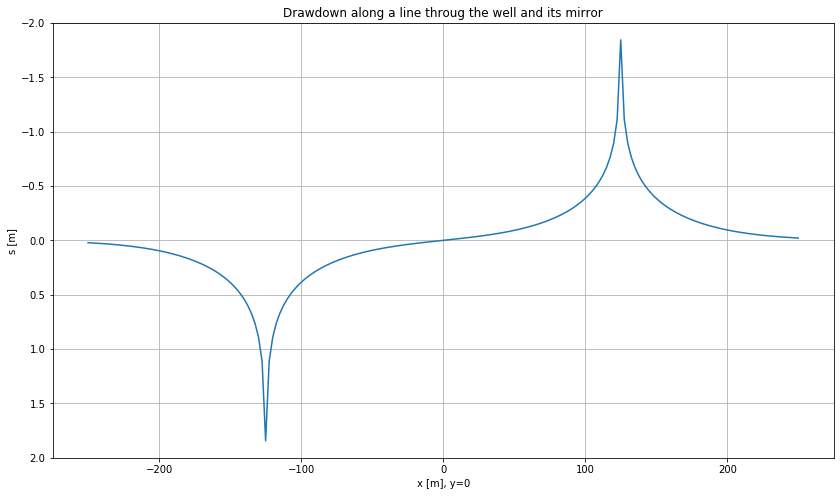

In [10]:
# Drawdown as arbitraty points x, y
x  = np.linspace(-2 * a, 2 * a, 201) # many x-coordinates
y  = np.zeros_like(x) # same number of y-coordinates, all value zero (line aloong x-axis)
rw = 0.25 # The well radius

# Compute the distance from each well to all observation points at once:
r1 = np.sqrt((x1 - x)**2 + (y1 - y)**2)
r2 = np.sqrt((x2 - x)**2 + (y2 - y)**2)

# Use logical indexing to set or exclude points or select specific ones. In this case
# we will put the distance of points closer than r_0 from the well (in fact inside the well) equal to
# r_0.
r1[r1<rw] = rw
r2[r2<rw] = rw

# Compute the argument of teh well function for all points at once:
u1 = r1**2 * S / (4 * kD * t)
u2 = r2**2 * S / (4 * kD * t)

# Compute the head due to the well and its mirror for all points at once
s = Q / (4 * np.pi *kD) * (exp1(u1) - exp1(u2))

ax = newfig('Drawdown along a line throug the well and its mirror', 'x [m], y=0', 's [m]', ylim=(2, -2))
# By using (2, -2) in ylim, we invert the vertical axis at the same time.

ax.plot(x, s)

plt.show()

# Compute the flow across a ring with radius r

The total flow across a ring with radius $r$ around a transient well is

$$ Q_r = Q_0 e^{-u} $$

And the specific discharge

$$ q_r = \frac {Q_0} {2 \pi r} e^{-u} $$

and points in the direction of the well.

## The specific discharge at randomly chosen points

Here we have a single well in location x0, y0 and a set randomly chosen points with coordinates in the vectors x and y.

The specific discharge is computed at all points at once. Then we compute the x and y components of these vectors. Finally we show them in a simple way, in which the point is indicated by a small circle and the discharge vector by a line with length proportional to its strength.

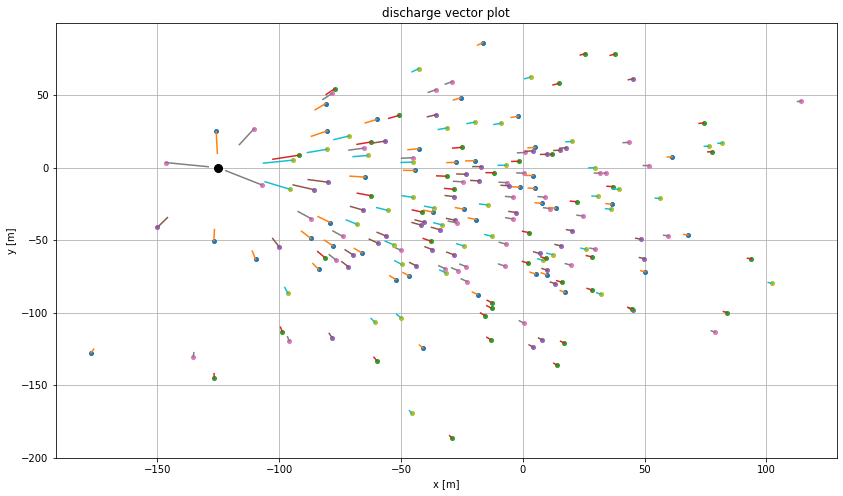

In [39]:
# Well properties
Q0, x0, y0 = 1200., -a, 0.  # the extractioni and location of the well

# Chose a set of randomly placed observation points
a = 50 # m  a length to scale randomly chosen points
n = 200
x = a * (np.random.randn(n) - 0.5)  # choose 25 random values, with average value 0
y = a * (np.random.randn(n) - 0.5)  # same

# Distance from the well to each of the random points
r = np.sqrt((x-x0)**2 + (y-y0)**2)

# u
u = r**2 * S /(4 * kD * t)

# the specific discharge
q = Q0 / (2 * np.pi * r) * np.exp(-u) # m2/d, see syllabus
alpha = np.arctan2(y - y0, x- x0) # angle between vector and horizontal
qx = q * np.cos(alpha)   # x component of specific discharge
qy = q * np.sin(alpha)   # y component of specific discharge

scale = 2.0 # scale factor to plot of the specific discharge vectors (arbiytrary, just for visualization)

ax = newfig('discharge vector plot', 'x [m]', 'y [m]')

# plot the location of the well as  black ('k') circle ('o') of size 8
ax.plot(x0, y0, 'ko', markersize=8)

# in a loop, plot one vector after another
for xi, yi, qxi, qyi in zip(x, y, qx, qy):
    ax.plot(xi, yi, 'o', markersize=4)    # plot marker at obs. point
    ax.plot([xi, xi - scale * qxi],
            [yi, yi - scale * qyi]) # plot vector



Of course, one could also draw contourlines.

## Including the mirror well in the discharge vector

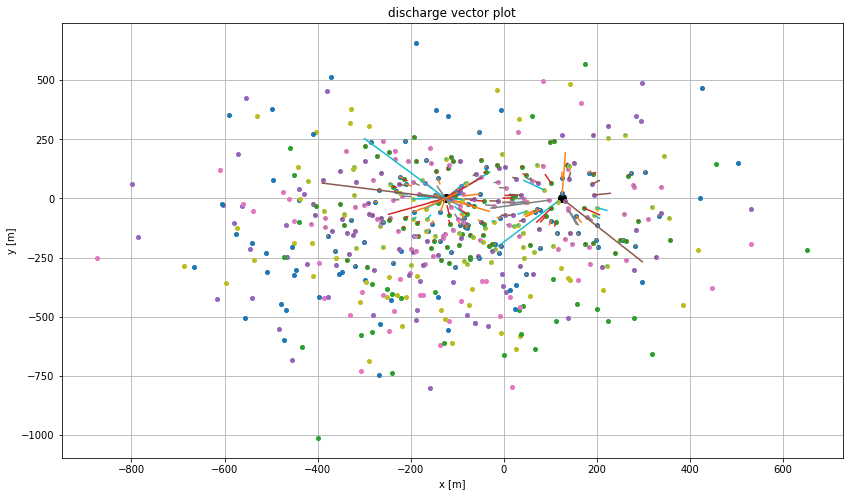

In [27]:
# Well properties
a = 125
Q = 1200 # m3/d extraction
x1, y1 = -a, 0.  # the extractioni and location of the well
x2, y2 = +a, 0.  # the extractioni and location of the well

# Chose a set of randomly placed observation points
n = 500
x = 2 * a * (np.random.randn(n) - 0.5)  # choose 25 random values, with average value 0
y = 2 * a * (np.random.randn(n) - 0.5)  # same

# Distance from the well to each of the random points
r1 = np.sqrt((x-x1)**2 + (y-y1)**2)
r2 = np.sqrt((x-x2)**2 + (y-y2)**2)

# u
u1 = r1**2 * S /(4 * kD * t)
u2 = r2**2 * S /(4 * kD * t)

# the specific discharge
q1 =  Q0 / (2 * np.pi * r1) * np.exp(-u1)
q2 = -Q0 / (2 * np.pi * r2) * np.exp(-u2) # sum because flows add

alpha1 = np.arctan2(y - y1, x- x1) # angle between vector and horizontal
alpha2 = np.arctan2(y - y2, x- x2) # angle between vector and horizontal

qx = q1 * np.cos(alpha1) + q2 * np.cos(alpha2)  # x component of specific discharge
qy = q1 * np.sin(alpha1) + q2 * np.sin(alpha2)   # y component of specific discharge

scale = 20.0 # scale factor to plot of the specific discharge vectors (arbiytrary, just for visualization)

ax = newfig('discharge vector plot', 'x [m]', 'y [m]')

# plot the location of the well as  black ('k') circle ('o') of size 8
ax.plot(x1, y1, 'ko', markersize=8, label='well')
ax.plot(x2, y2, 'ko', markersize=8, label='mirror well')

# in a loop, plot one vector after another
for xi, yi, qxi, qyi in zip(x, y, qx, qy):
    ax.plot(xi, yi, 'o', markersize=4)    # plot marker at obs. point
    ax.plot([xi, xi - scale * qxi],
            [yi, yi - scale * qyi]) # plot vector



## Inflow from the river

First we'll show the flux flowing from the river into the aquifer at a point in time.

In the section thereafter, we'll integrate the flux along the bank of the river to get the total inflow.

The inflowing flux at the river bank is obtained from the x-component of the discharge vectors of both wells in point of the river bank. We just compute the vector for each well separately and add the x and y component of the well and its mirror in river-bank points. Because the river bank lies along the y-axis, we only need the x-component of the discharge vectors.

Max qy = -2.776e-16, min qy = 2.77556e-16 m2/d


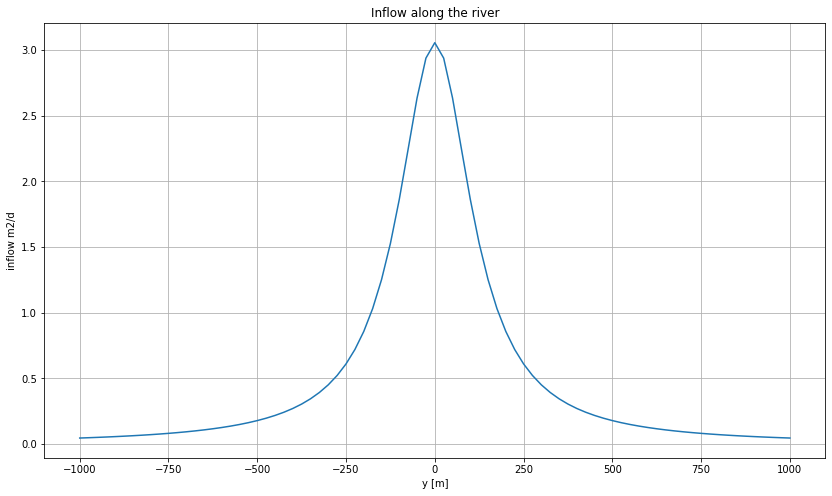

In [42]:
Q = 1200 # m3/d

a = 125 # m, distance of well to river shore
x1, y1 = -a, 0 # location of well
x2, y2 = +a, 0 # location of mirror well

# Choose points along the river bank
y = np.linspace(-1000, 1000, 81)
x = np.zeros_like(y)

r1 = np.sqrt((x - x1) ** 2 + (y - y1) ** 2)
r2 = np.sqrt((x - x2) ** 2 + (y - y2) ** 2)

u1 = r1 ** 2 * S / (4 * kD * t)
u2 = r2 ** 2 * S / (4 * kD * t)

q1 = +Q / (2 * np.pi * r1) * np.exp(-u1)
q2 = -Q / (2 * np.pi * r2) * np.exp(-u2)

alpha1 = np.arctan2(y, x - x1)
alpha2 = np.arctan2(y, x - x2)

qx = q1 * np.cos(alpha1) + q2 * np.cos(alpha2)
qy = q1 * np.sin(alpha1) + q2 * np.sin(alpha2) # Will be zero for all bank points.

qin = qx # we only need the x-component.

ax = newfig('Inflow along the river', 'y [m]', 'inflow m2/d')
plt.plot(y, qin)

# show tyat qy is zero
print(f'Max qy = {np.min(qy):.4g}, min qy = {np.max(qy):4g} m2/d')

###  Compute the total inflow at a given time

We have to integrate the inflow along the y axis.

To do this, we take the pieces $\Delta y$ between the chosen point on the $y$ axis and multiply them with the averate value of $q_{in}$ at each piece on the $y$ axis.

In [43]:
dy = y[1:] - y[:-1] # or np.diff(y)
qm = 0.5 * (qin[:-1] + qin[1:]) # or np.diff(qin)
Qin = np.sum(qm * dy) # total inflow through the river bank
print('Total inflow with Q={:.0f} at t={:.1f} d equals {:.1f} m3/d'\
     .format(Q, t, Qin))

Total inflow with Q=1200 at t=3590.0 d equals 1102.3 m3/d


The compute inflow will approach the true inflow better, the longer the part of the y-axis is chosen.

# Show the total inflow for many times but a constant well extraction

To to this, a loop it necessary to compute the inflow for each time at a time and collect the results.

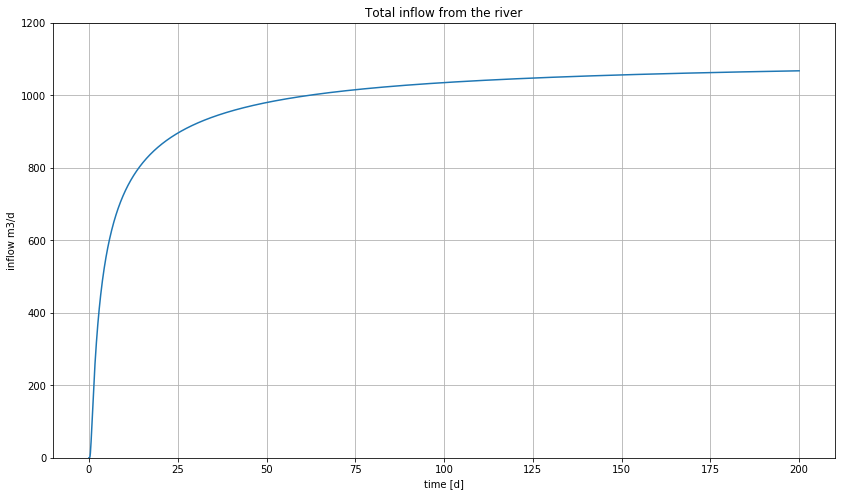

In [33]:
# The data

Q = 1200 # m3/d

b = 125 # m, distance of well to river shore
x1, y1 = -b, 0 # location of well
x2, y2 = +b, 0 # location of mirror well

# The times
times = np.linspace(0, 200, 2001)
times[0] = 0.0001  # to prevent computing for t=0 use a very small number

# all parameters that are constant in time 
y = np.linspace(-1000, 1000, 81)
x = np.zeros_like(y)

dy = y[1:] - y[:-1]

r1 = np.sqrt((x - x1) ** 2 + (y - y1) ** 2)
r2 = np.sqrt((x - x2) ** 2 + (y - y2) ** 2)

alpha1 = np.arctan2(y, x - x1)
alpha2 = np.arctan2(y, x - x2)

ax = newfig('Total inflow from the river', 'time [d]', 'inflow m3/d', ylim=(0, Q))

# Compute for each time in turn
Qin = [] # empty list in which the values will be assembled
for t in times: # t is the next value from times in the loop
    u1 = r1 ** 2 * S / (4 * kD * t)
    u2 = r2 ** 2 * S / (4 * kD * t)

    q1 = +Q / (2 * np.pi * r1) * np.exp(-u1)
    q2 = -Q / (2 * np.pi * r2) * np.exp(-u2)

    qx = q1 * np.cos(alpha1) + q2 * np.cos(alpha2)
    qy = q1 * np.sin(alpha1) + q2 * np.sin(alpha2)

    qin = qx
    
    qm = 0.5 * (qin[:-1] + qin[1:])
    Qin.append(np.sum(qm * dy)) # append next value

ax.plot(times, Qin)  # plot the curve

# embellishment of the plot


# Everything combined, many times, with varying well extraction

Every winter the extration is Q0 and during the summer it is -Q0

We simulate 10 years using superosition in time. The winter injection
will start each year in September and the summer extraction each year in april. Let's define the start times in days since the start of of the first year, assuming for simplicity that a month as always 30 days.

In [34]:
Q0 = 2400 # m3/d
kD = 500 # m2/d
S  = 0.2 # [-]

# all variable that are constant in time:

b = 1500 # m, distance of well to river shore
x1, y1 = -b, 0 # location of well
x2, y2 = +b, 0 # location of mirror well

# all parameters that are constant in time 
y = np.linspace(-1000, 1000, 81)
x = np.zeros_like(y)

dy = y[1:] - y[:-1]

r1 = np.sqrt((x - x1) ** 2 + (y - y1) ** 2)
r2 = np.sqrt((x - x2) ** 2 + (y - y2) ** 2)

alpha1 = np.arctan2(y, x - x1)
alpha2 = np.arctan2(y, x - x2)



The first time the injection is Q.
Then at each time when extraction starts, is has -2Q
And then each time when we switch back to injection the flow is +2Q

The flows to be used for superposition in time are

Month  9,  15,  21,  27,  33,  39,  45, ...

Flow   Q, -2Q, 2Q, -2Q,  2Q, -2Q,  2Q, ...

Now define the times at which the total inflow is to be computed.

In [35]:
# Set the times when pumping switches
#              start, end, step
month = np.arange(9, 120, 6) # month numbers at which flow switches
                            #counting from Jan 1 in first year
Tsw = 30 * month   # t at which flow switches in days

# set the pumping flow at the switch points
Qsw = Q0 * 2 * (-1) ** np.arange(len(Tsw))
Qsw[0] = Q0

# Show them
print('{:>6} {:>6}'.format('Tsw[d]', 'Qsw'))
for tsw, Q in zip(Tsw, Qsw):
    print('{:6.0f} {:6.0f}'.format(tsw, Q))


Tsw[d]    Qsw
   270   2400
   450  -4800
   630   4800
   810  -4800
   990   4800
  1170  -4800
  1350   4800
  1530  -4800
  1710   4800
  1890  -4800
  2070   4800
  2250  -4800
  2430   4800
  2610  -4800
  2790   4800
  2970  -4800
  3150   4800
  3330  -4800
  3510   4800


Choose times at which we want to see the total inflow

In [36]:
# The small values prevents computing flows at the time the well starts
# t is now just a negilible time later.
#            start  end      step
times = np.arange(0, 30 * 12 * 10, 10) + 0.00001  # 10 years in days in 10 day steps

Actual computation for all times

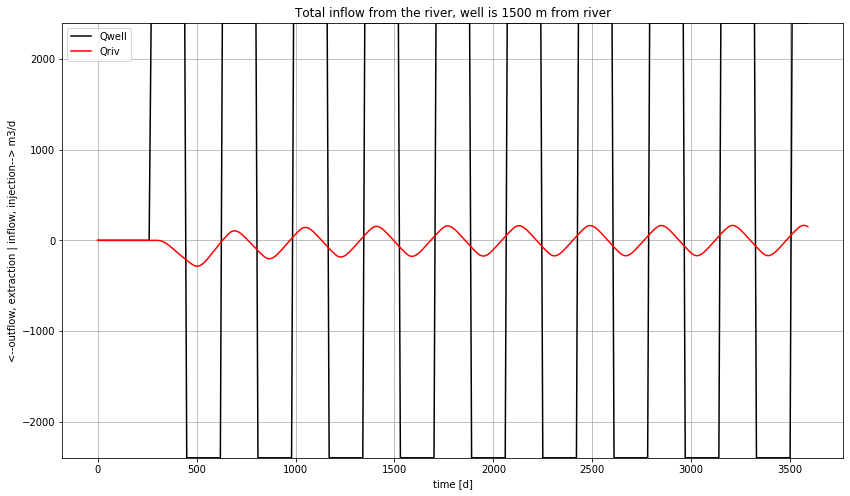

In [38]:
# embellishment of the plot
ax = newfig(f'Total inflow from the river, well is {b:.0f} m from river', 'time [d]',
                                        '<--outflow, extraction | inflow, injection--> m3/d')

plt.ylim(-Q0, Q0) # maximum value is Q, the total extraction

Qriv = [] # empty list in which the values will be assembled
Qwell= []
for t in times: # t is the next value from times in the loop
    Qsum = 0.
    Qtot = 0.
    for tsw, Q in zip(Tsw, Qsw):
        if t > tsw:
            u1 = r1 ** 2 * S / (4 * kD * (t - tsw))
            u2 = r2 ** 2 * S / (4 * kD * (t - tsw))

            q1 = +Q / (2 * np.pi * r1) * np.exp(-u1)
            q2 = -Q / (2 * np.pi * r2) * np.exp(-u2)

            qx = q1 * np.cos(alpha1) + q2 * np.cos(alpha2)
            qy = q1 * np.sin(alpha1) + q2 * np.sin(alpha2)

            qin = qx

            qm = 0.5 * (qin[:-1] + qin[1:])
            Qsum = Qsum + np.sum(qm * dy)
            Qtot = Qtot + Q
    Qriv.append(-Qsum) # append next value
    Qwell.append(Qtot)

# plot the curve
ax.plot(times, Qwell, 'k', label='Qwell')
ax.plot(times, Qriv, 'r', label='Qriv')

ax.legend()